In [2]:
import pandas as pd # working with tabular data
import pickle # for machine learning models
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization

from sklearn.feature_extraction import DictVectorizer # Machine Learning
from sklearn.linear_model import LinearRegression # Machine Learning
from sklearn.linear_model import Lasso # Regularization
from sklearn.linear_model import Ridge # Regularization

from sklearn.metrics import mean_squared_error # Loss Function

In [3]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet

--2023-05-24 09:53:36--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 52.222.137.90, 52.222.137.206, 52.222.137.46, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|52.222.137.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38139949 (36M) [application/x-www-form-urlencoded]
Saving to: 'yellow_tripdata_2022-01.parquet'

     0K .......... .......... .......... .......... ..........  0%  279K 2m13s
    50K .......... .......... .......... .......... ..........  0%  618K 97s
   100K .......... .......... .......... .......... ..........  0%  555K 87s
   150K .......... .......... .......... .......... ..........  0%  781K 77s
   200K .......... .......... .......... .......... ..........  0% 1.05M 68s
   250K .......... .......... .......... .......... ..........  0% 1.73M 60s
   300K .......... .......... .......... ....

  5450K .......... .......... .......... .......... .......... 14%  224M 11s
  5500K .......... .......... .......... .......... .......... 14%  208M 11s
  5550K .......... .......... .......... .......... .......... 15% 94.8M 11s
  5600K .......... .......... .......... .......... .......... 15%  156M 11s
  5650K .......... .......... .......... .......... .......... 15%  168M 11s
  5700K .......... .......... .......... .......... .......... 15%  270M 11s
  5750K .......... .......... .......... .......... .......... 15%  239M 11s
  5800K .......... .......... .......... .......... .......... 15%  177M 11s
  5850K .......... .......... .......... .......... .......... 15%  155M 11s
  5900K .......... .......... .......... .......... .......... 15%  237M 10s
  5950K .......... .......... .......... .......... .......... 16% 91.5M 10s
  6000K .......... .......... .......... .......... .......... 16%  217M 10s
  6050K .......... .......... .......... .......... .......... 16%  288M 10s

 36900K .......... .......... .......... .......... .......... 82% 8.27M 1s
 36950K .......... .......... .......... .......... .......... 83% 8.29M 1s
 37000K .......... .......... .......... .......... .......... 83% 17.8M 1s
 37050K .......... .......... .......... .......... .......... 83% 7.71M 1s
 37100K .......... .......... .......... .......... .......... 83% 18.5M 1s
 37150K .......... .......... .......... .......... .......... 83% 18.0M 1s
 37200K .......... .......... .......... .......... .......... 83% 13.0M 1s
 37250K .......... .......... .......... .......... .......... 83% 13.4M 1s
 37300K .......... .......... .......... .......... .......... 83% 11.2M 1s
 37350K .......... .......... .......... .......... .......... 83% 8.58M 1s
 37400K .......... .......... .......... .......... .......... 84% 8.79M 1s
 37450K .......... .......... .......... .......... .......... 84% 10.6M 1s
 37500K .......... .......... .......... .......... .......... 84% 14.8M 1s
 37550K ....

In [6]:
!pip install pyarrow
!pip install fastparquet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.



     -------------------------------------- 620.2/620.2 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 10.7/10.7 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 600.4 kB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


db-dtypes 1.0.5 requires pandas<2.0dev,>=0.24.2, but you have pandas 2.0.1 which is incompatible.
pandas-gbq 0.19.1 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
statsmodels 0.13.2 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.


In [7]:
yellow_jan_22 = pd.read_parquet('yellow_tripdata_2022-01.parquet')
yellow_jan_22

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN


In [10]:
yellow_jan_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

Let’s create a new column duration which calculates the length of each ride :

In [11]:
yellow_jan_22['duration'] = yellow_jan_22.tpep_dropoff_datetime - yellow_jan_22.tpep_pickup_datetime
yellow_jan_22.duration = yellow_jan_22.duration.apply(lambda td: td.total_seconds()/60)

In [12]:
yellow_jan_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

Great, we now have a duration column and PULocationID and DOLocationID are now correctly showing as datatype object (categorical data, which includes strings).


# 1.3.2 Distribution of our data

It’s often useful to get an idea of the distribution of our data. We can get a quick overview :

In [13]:
yellow_jan_22.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
count,2.463931e+06,2.392428e+06,2.463931e+06,2.392428e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.392428e+06,2.392428e+06,2.463931e+06
mean,1.707819e+00,1.389453e+00,5.372751e+00,1.415507e+00,1.660768e+02,1.635807e+02,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.282322e+00,8.249935e-02,1.421220e+01
std,5.021375e-01,9.829686e-01,5.478714e+02,5.917573e+00,6.546806e+01,7.079016e+01,5.001778e-01,2.558149e+02,1.236226e+00,8.291560e-02,2.830698e+00,1.680538e+00,4.374741e-02,2.559641e+02,7.432040e-01,3.125554e-01,4.644531e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00,-3.442400e+03
25%,1.000000e+00,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00,6.316667e+00
50%,2.000000e+00,1.000000e+00,1.740000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00,1.018333e+01
75%,2.000000e+00,1.000000e+00,3.130000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00,1.616667e+01
max,6.000000e+00,9.000000e+00,3.061593e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00,8.513183e+03



The given notes explain the concept of outliers, their impact on statistical analyses and machine learning models, and provide strategies for dealing with outliers in a dataset. Here's a detailed explanation of each point and an outline of how to deal with outliers:

Understanding Outliers: Outliers are data points that significantly deviate from the general pattern or distribution of the rest of the data. They are observations that are extremely different or unusual compared to the majority of the dataset. Outliers can occur due to various reasons, such as measurement errors, data entry mistakes, or genuinely rare events.

Impact of Outliers: Outliers can have a substantial impact on statistical analyses and machine learning models. They can skew summary statistics, such as the mean and standard deviation, leading to biased estimations. Outliers can also influence the fitting of models, affecting the coefficients or parameters estimated.

## Strategies for Dealing with Outliers:
a. Removing outliers: In certain cases, outliers can be removed from the dataset if they are determined to be due to data entry errors or measurement issues. However, caution must be exercised, as removing outliers indiscriminately can lead to the loss of valuable information.

b. Transforming the data: Applying data transformations, such as logarithmic or power transformations, can help mitigate the impact of outliers and make the data more normally distributed.

c. Winsorizing or capping: Winsorizing involves replacing extreme values with less extreme values, such as replacing values above a certain threshold with the value at that threshold. This approach reduces the impact of outliers without entirely removing them from the dataset.

d. Robust statistical methods: Utilizing robust statistical techniques, such as median and median absolute deviation, instead of mean and standard deviation, can provide more resistant estimators that are less influenced by outliers.

Appropriate Treatment of Outliers: It's important to note that the appropriate treatment of outliers depends on the specific context, domain knowledge, and the goals of the analysis. Careful consideration and understanding of the data and its characteristics are crucial in handling outliers effectively.

Based on the provided notes, the decision is made to remove the outliers as they seem to be due to measurement issues. Specifically, the plan is to keep only the records where the duration was between 1 and 60 minutes (inclusive). This approach narrows down the range of values to a more reasonable and realistic range for the duration variable in the dataset.

To implement this plan, you can follow these steps:

Identify the variable or variables that represent the duration in your dataset.

Filter the dataset to retain only the records where the duration falls within the desired range (1 to 60 minutes). This can be done using conditional filtering or querying techniques provided by the data analysis tool or programming language you are using.

Create a new dataset or update the existing dataset with the filtered records, discarding the outliers.

By removing the outliers and focusing on a more reasonable range of durations, you can ensure that the analysis and modeling processes are based on more reliable and meaningful data.

In [24]:
"""
 We can remove outliers from the yellow_jan_22 dataset based on the duration variable.
 Here's a breakdown of how the code achieves this:

yellow_jan_22.duration refers to the duration column in the yellow_jan_22 dataset.
This column contains the duration values for each record in the dataset.

(yellow_jan_22.duration >= 1) & (yellow_jan_22.duration <= 60) creates a boolean mask that checks 
if the duration values fall within the range of 1 to 60 minutes (inclusive).
It returns True for the records where the duration meets this condition and False for the outliers.

yellow_jan_22[(yellow_jan_22.duration >= 1) & (yellow_jan_22.duration <= 60)] applies the boolean mask as
an indexing condition to the yellow_jan_22 dataset. 
It selects only the records where the duration falls within the desired range and removes the outliers.

By assigning the filtered subset of the dataset back to the yellow_jan_22 variable, 
the code effectively removes the outliers and updates the dataset to include only the
records with durations between 1 and 60 minutes (inclusive). The resulting yellow_jan_22 dataset will
contain a subset of the original records, excluding the outliers that fell outside the specified duration range.
"""
yellow_jan_22 = yellow_jan_22[(yellow_jan_22.duration >= 1) & (yellow_jan_22.duration <= 60)]
yellow_jan_22 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN,5.966667
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN,10.650000
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN,11.000000
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN,12.050000


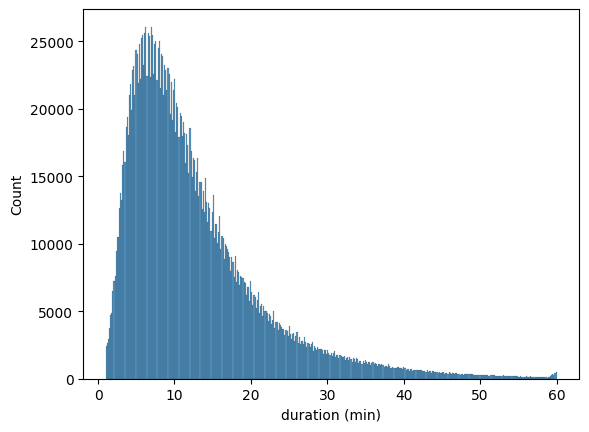

In [21]:
sns.histplot(yellow_jan_22['duration'].values)
plt.xlabel("duration (min)");

In [25]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

yellow_jan_22[categorical] = yellow_jan_22[categorical].astype(str)


The provided code demonstrates the process of applying one-hot encoding to categorical variables, specifically the pickup and dropoff location IDs in the yellow_jan_22 dataset. Let's discuss the relevance of one-hot encoding, its purpose, and what the code aims to achieve:

### Relevance of One-Hot Encoding:
One-hot encoding is relevant when dealing with categorical variables in machine learning tasks. It allows us to convert categorical data into a numerical representation that can be utilized by machine learning algorithms. By doing so, we can incorporate categorical information into our models and algorithms, which typically operate on numerical data.

### Purpose of One-Hot Encoding:
The main purpose of one-hot encoding is to transform categorical variables into a binary vector format, where each category is represented by a binary feature. This transformation enables machine learning models to understand and leverage categorical information effectively. It ensures that the model does not assume any ordinal relationship or numerical significance among the categories.

### Explanation of the Code:
The code provided performs the following steps to apply one-hot encoding to the pickup and dropoff location IDs:

*Create a List of Dictionaries*: The categorical columns (pickup and dropoff location IDs) are converted into a list of dictionaries using `yellow_jan_22[categorical].to_dict(orient='records')`. Each dictionary represents a record and contains the categorical variable names as keys and their corresponding values.

*Instantiate a Dictionary Vectorizer*: The `DictVectorizer` class is instantiated as `dv` to handle the conversion of the list of dictionaries into a feature matrix.

*Fit and Transform the Data*: The `fit_transform` method of the DictVectorizer is applied to the list of dictionaries (list_of_dicts). This step fits the vectorizer to the data and transforms the data into a feature matrix (`fm`).

*Convert Feature Matrix to Array*: The `toarray()` method is used to convert the feature matrix (`fm`) into a dense array (`fm_array`).

*Print Dimensionality of the Feature Matrix*: The dimensionality of the feature matrix is printed using `fm_array.shape`, providing insights into the number of features (columns) and the number of records (rows) in the matrix.

### What the Code Aims to Achieve:
The code aims to apply one-hot encoding to the categorical variables of pickup and dropoff location IDs. By doing so, it transforms these categorical variables into a numerical representation suitable for machine learning algorithms. The resulting feature matrix (`fm_array`) will contain binary features representing the unique categories of the pickup and dropoff location IDs. The printed dimensionality of the feature matrix helps us understand the number of features and records in the transformed data.

Overall, this process enables us to incorporate categorical variables into machine learning models, providing them with the necessary information to make accurate predictions or classifications.

In [26]:
# turn the categorical columns into a list of dictionaries
list_of_dicts = yellow_jan_22[categorical].to_dict(orient='records')

# Instantiate a dictionary vectorizer
dv = DictVectorizer()

# Fit the vectorizer and transform the data into a feature matrix
fm = dv.fit_transform(list_of_dicts)

# Convert the feature matrix to an array
fm_array = fm.toarray()

# Print the dimensionality of the feature matrix
dimensionality = fm_array.shape
print("Dimensionality:", dimensionality)

Dimensionality: (2421440, 515)


In [ ]:
!pip install alive-progress

In [ ]:
from alive_progress import alive_bar
import time

# turn the categorical columns into a list of dictionaries
list_of_dicts = yellow_jan_22[categorical].to_dict(orient='records')

# Instantiate a dictionary vectorizer
dv = DictVectorizer()

# Fit the vectorizer and transform the data into a feature matrix
fm = None

with alive_bar(len(list_of_dicts)) as bar:
    for i, data_dict in enumerate(list_of_dicts):
        # Simulating some processing time
        time.sleep(0.1)
        
        if fm is None:
            fm = dv.fit_transform([data_dict])
        else:
            fm = dv.transform([data_dict])
        
        bar()

# Convert the feature matrix to an array
fm_array = fm.toarray()

# Print the dimensionality of the feature matrix
dimensionality = fm_array.shape
print("Dimensionality:", dimensionality)


## Customized pre-processing function

We can automate the process of getting the data fit for modelling or for building mode by creating a custom function called customized pre-processing function called read_dataframe. This function takes a filename as input and performs several data preparation steps to make the data suitable for training.

The function begins by checking the file extension of the input filename. If it ends with '.csv', it assumes the file is a CSV file and uses pd.read_csv() to read the data into a Pandas DataFrame. If it ends with '.parquet', it assumes the file is a Parquet file and uses pd.read_parquet() to read the data.

Next, the function converts the 'tpep_dropoff_datetime' and 'tpep_pickup_datetime' columns to datetime format using pd.to_datetime(). This step ensures that the timestamps are correctly interpreted as datetime objects.

The function then calculates the duration of each trip by subtracting the 'tpep_pickup_datetime' from the 'tpep_dropoff_datetime'. The resulting timedelta object is converted to minutes by applying a lambda function that divides the total seconds by 60.

After calculating the duration, the function filters the DataFrame to keep only the records where the duration is between 1 and 60 minutes (inclusive). This step removes outliers or erroneous data points outside the desired range.

The next step involves converting specific columns ('PULocationID' and 'DOLocationID') to string type using the astype() method. This conversion is necessary for one-hot encoding categorical features later in the analysis.

Finally, the function returns the pre-processed DataFrame.

The purpose of this customized pre-processing function is to encapsulate all the necessary data preparation steps in a single function, allowing for easy and consistent processing of different datasets. By using this function, one can conveniently read and pre-process data without duplicating the same code and steps multiple times. It promotes code reusability, maintainability, and reduces the chance of errors when performing the same data preparation tasks repeatedly.

In [ ]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

### Training a model
In this step, we are training a Linear Regression model using the feature matrix obtained from the previous step. The goal is to create a predictive model that can estimate the target variable, which in this case is the 'duration' of the taxi trips.

Here's a breakdown of the code:

Convert categorical columns to a dictionary: The categorical columns, represented by the 'categorical' variable, are converted to a list of dictionaries using the to_dict() function. Each dictionary represents a data point (row) in the dataset, where the keys correspond to the column names and the values represent the categorical values for each column.

Instantiate a dictionary vectorizer: We create an instance of the DictVectorizer class, which is used to transform the categorical data into a numerical representation suitable for the model.

Set up the training set: The training set, denoted as X_train, is obtained by applying the fit_transform() method of the dictionary vectorizer to the list of dictionaries created in step 1. This step converts the categorical features into a feature matrix that the Linear Regression model can work with.

Define the target variable: The target variable, 'duration', is assigned to the variable target. The .values attribute is used to extract the values of the target variable from the 'yellow_jan_22' dataset and assign it to the variable y_train. The target variable represents the dependent variable that the model aims to predict.

Once this code is executed, we have the feature matrix X_train containing the transformed categorical features, and the target variable y_train ready for training the Linear Regression model.

In [ ]:
# Convert categorical columns to a dictionary
train_dicts = yellow_jan_22[categorical].to_dict(orient='records')

# Instantiate a dictionary vectorizer
dv = DictVectorizer()

# Set up trainign set
X_train = dv.fit_transform(train_dicts)

In [ ]:
# define target variable and assign to y_train
target = 'duration'
y_train = yellow_jan_22[target].values

### Linear Regression

A linear regression model is a statistical approach used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables and aims to find the best-fitting line that minimizes the differences between the predicted and actual values.

The model assumes that the dependent variable can be expressed as a linear combination of the independent variables, where each independent variable is multiplied by a coefficient and summed together with an intercept term. The coefficients represent the effect of each independent variable on the dependent variable, and the intercept term represents the expected value of the dependent variable when all independent variables are zero.

Linear regression models are widely used for various purposes, such as predicting sales based on advertising expenditure, analyzing the impact of independent variables on a dependent variable, and making forecasts.

In our case we are going to used linear regression to predict the duration of taxi rides.

# instantiate linear regression model with default parameters
lr = LinearRegression()

# fit model to training data
lr.fit(X_train, y_train)

### Get predictions

Once the model is trained, it can be used to make predictions by plugging in new values for the independent variables. The model assumes that the relationship between the variables remains linear and that the underlying assumptions, such as linearity, independence, and homoscedasticity, hold true.

# get predictions
y_pred = lr.predict(X_train)

### Loss function - RMSE

The process of building a linear regression model involves estimating the coefficients that minimize a chosen error metric, such as the `mean squared error (MSE)`. This is typically done using a technique called `ordinary least squares (OLS)`, which finds the coefficients that minimize the sum of squared differences between the predicted and actual values.

The RMSE is the square root of the `mean squared error (MSE)`.

In [ ]:
# calculate RMSE
mean_squared_error(y_train, y_pred, squared=False) # squared = False so this is root MSE (RMSE)

### Evaluating our model - validation set

After training the model on the training set, the model’s performance is evaluated on the validation set.

A validation set, also known as a validation dataset, is a subset of data used to assess the performance and generalization ability of a machine learning model. It is important to note that the validation set should be kept separate from the training set and not be used for model training. Mixing the training and validation data may lead to biased performance estimates and ineffective model evaluation

The purpose of a validation set is to provide an unbiased estimate of how well the model will perform on new, unseen data. It helps in assessing whether the model has learned the underlying patterns and relationships in the data or if it has overfit or underfit the training data.

Once the model’s hyperparameters are optimized, a final evaluation on a separate test set, which represents completely unseen data, provides a more accurate assessment of the model’s performance and generalization ability.

Let’s evaluate our model on the unseen Yellow Taxi February 2022 dataset that we downloaded earlier :

# read in the validation set
yellow_feb_22 = pd.read_parquet('yellow_tripdata_2022-02.parquet')

# create a new column 'duration' in minutes
yellow_feb_22['duration'] = yellow_feb_22.tpep_dropoff_datetime - yellow_feb_22.tpep_pickup_datetime
# convert duration to seconds
yellow_feb_22.duration = yellow_feb_22.duration.apply(lambda td: td.total_seconds()/60)

# define categorical and numerical columns
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

# convert categorical columns to strings
yellow_feb_22[categorical] = yellow_feb_22[categorical].astype(str)

# remove outliers by clipping duration between 1 and 60 mins
yellow_feb_22 = yellow_feb_22[(yellow_feb_22.duration >= 1) & (yellow_feb_22.duration <= 60)]

# Instantiate a dictionary vectorizer
dv = DictVectorizer()

# reinstate our training set
train_dicts = yellow_jan_22[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

# turn the categorical columns into a list of dictionaries
val_dicts = yellow_feb_22[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

# define target variable and assign to y_val
target = 'duration'
y_train = yellow_jan_22[target].values
y_val = yellow_feb_22[target].values

# instantiate & fit our model to the TRAINING set
lr = LinearRegression()
lr.fit(X_train,y_train)

# Get predictions for the VALIDATION set
y_pred = lr.predict(X_val)

# calculate RMSE
mean_squared_error(y_val, y_pred, squared=False) # squared = False so this is root MSE (RMSE)

So the RMSE on the validation set is 7.79 against 6.99 on the test set. This means that our predictions on the duration of taxi trips are wrong on average by 8 minutes. This is a starting baseline for improvement.

### Visualization

We can visualize our predictions versus actuals using the Seaborn library :

In [ ]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()